In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline

Image type: torch.FloatTensor
Image size: torch.Size([1, 48, 48])


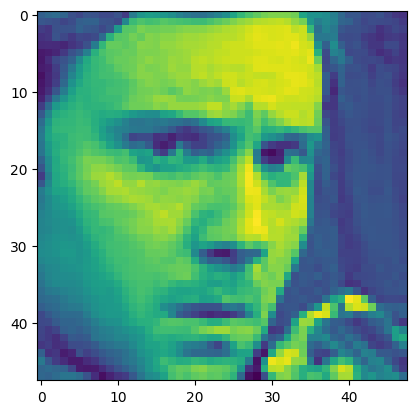

In [7]:
# pytorch provides a function to convert PIL image to tensors 
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

# Read the image from file. Assuming it is in the same directory.
pil_image = Image.open('dataset/1/images/images/train/angry/0.jpg')
rgb_image = pil2tensor(pil_image)

# Plot the image here using matplotlib. 
def plot_image(tensor):
    plt.figure()
    
    # imshow needs a numpy array with the channel dimension
    # as the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1 , 2 , 0))

plot_image(rgb_image)

# Show the image tensor type and tensor size here.
print('Image type: ' + str(rgb_image.type()))
print('Image size: ' + str(rgb_image.size()))

In [23]:
img = Image.open('dataset/1/images/images/train/angry/0.jpg')
print(f"Image mode: {img.mode}")  # Check if 'L' (grayscale) or 'RGB'
print(f"Image size: {img.size}")   # (width, height)

Image mode: L
Image size: (48, 48)


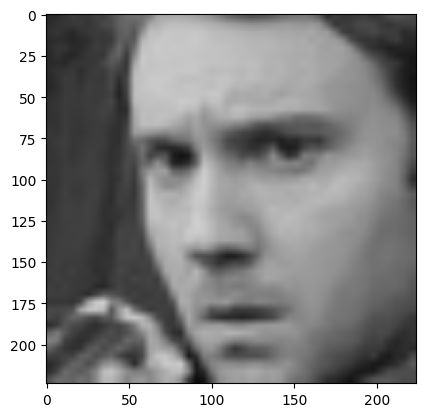

In [37]:
# Create a transform chain for pytorch 
from torchvision.transforms import v2

transforms = v2.Compose([
    v2.ToTensor(),
    v2.Grayscale(num_output_channels=3),  # Convert 1 channel → 3 channels
    v2.Resize(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),  # Data augmentation
    v2.ToDtype(torch.float32, scale=True),
])

img = Image.open('dataset/1/images/images/train/angry/0.jpg')
img = transforms(img)

plot_image(img)



In [25]:
print(f"Shape: {img.shape}")           # torch.Size([3, 224, 224])
print(f"Dimensions: {img.ndim}")       # 3
print(f"Size: {img.size()}")           # Same as shape
print(f"Data type: {img.dtype}")       # torch.float32
print(f"Item size (bytes): {img.element_size()}")  # 4 (float32 = 4 bytes)
print(f"Total elements: {img.numel()}") # 3 * 224 * 224 = 150,528
print(f"Memory (bytes): {img.numel() * img.element_size()}")  # 602,112 bytes

Shape: torch.Size([3, 224, 224])
Dimensions: 3
Size: torch.Size([3, 224, 224])
Data type: torch.float32
Item size (bytes): 4
Total elements: 150528
Memory (bytes): 602112
